## importing all the required libraries for the analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## importing all the libraries for machine learning model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## loading iris dataset

In [4]:
iris = pd.read_csv("Iris.csv") 

In [5]:
iris.head() #to see the first 5 rows of the datasets

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail() #to see the last 5 rows of the datasets

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris.isnull().sum() #here we check the null values in any column

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## generate descriptive statistics of the Iris dataset

In [8]:
iris.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.columns #use to see the column names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
iris["Species"].value_counts() # To know distinct values in a column and their corresponding count

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
specific_col = ['SepalWidthCm','Species']
iris[specific_col] #as per the result we can observe some trends that when SepalWidth are smaller then species are Setosa and for larger it is Virginica

,SepalWidthCm,Species
0,3.5,Iris-setosa
1,3.0,Iris-setosa
2,3.2,Iris-setosa
3,3.1,Iris-setosa
4,3.6,Iris-setosa
...,...,...
145,3.0,Iris-virginica
146,2.5,Iris-virginica
147,3.0,Iris-virginica
148,3.4,Iris-virginica


Text(0.5, 1.0, 'Distribution of Sepal Width by Species')

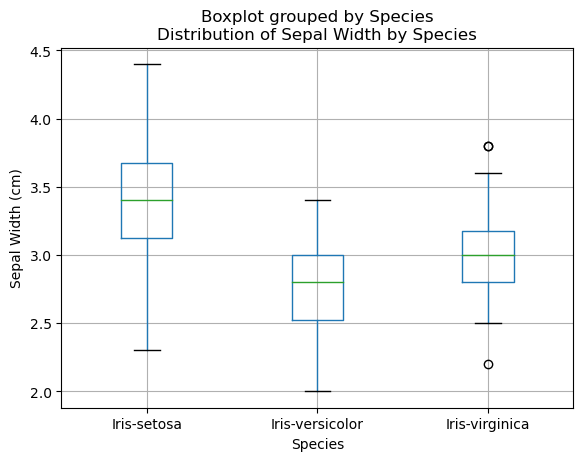

In [12]:
fig, ax = plt.subplots()
iris.boxplot(column='SepalWidthCm', by='Species', ax=ax)

# Set the axis labels and title
ax.set_xlabel('Species')
ax.set_ylabel('Sepal Width (cm)')
ax.set_title('Distribution of Sepal Width by Species')

#using this visuals we can see the trends.

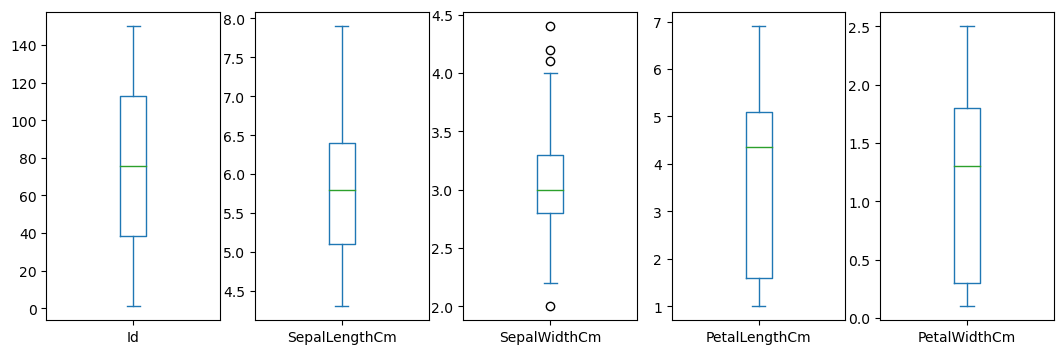

In [13]:
iris.plot(kind='box', subplots=True,figsize=(13, 4), sharex=False, sharey=False)
plt.show()

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'SepalLengthCm'}>],
       [<Axes: title={'center': 'SepalWidthCm'}>,
        <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'PetalWidthCm'}>, <Axes: >]], dtype=object)

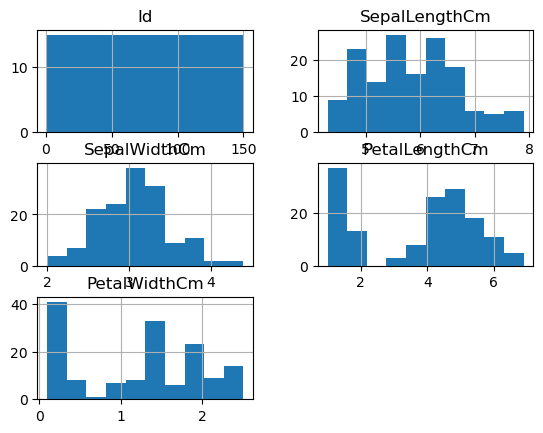

In [15]:
iris.hist()

Id                  Axes(0.125,0.11;0.133621x0.77)
PetalLengthCm    Axes(0.285345,0.11;0.133621x0.77)
PetalWidthCm      Axes(0.44569,0.11;0.133621x0.77)
SepalLengthCm    Axes(0.606034,0.11;0.133621x0.77)
SepalWidthCm     Axes(0.766379,0.11;0.133621x0.77)
dtype: object

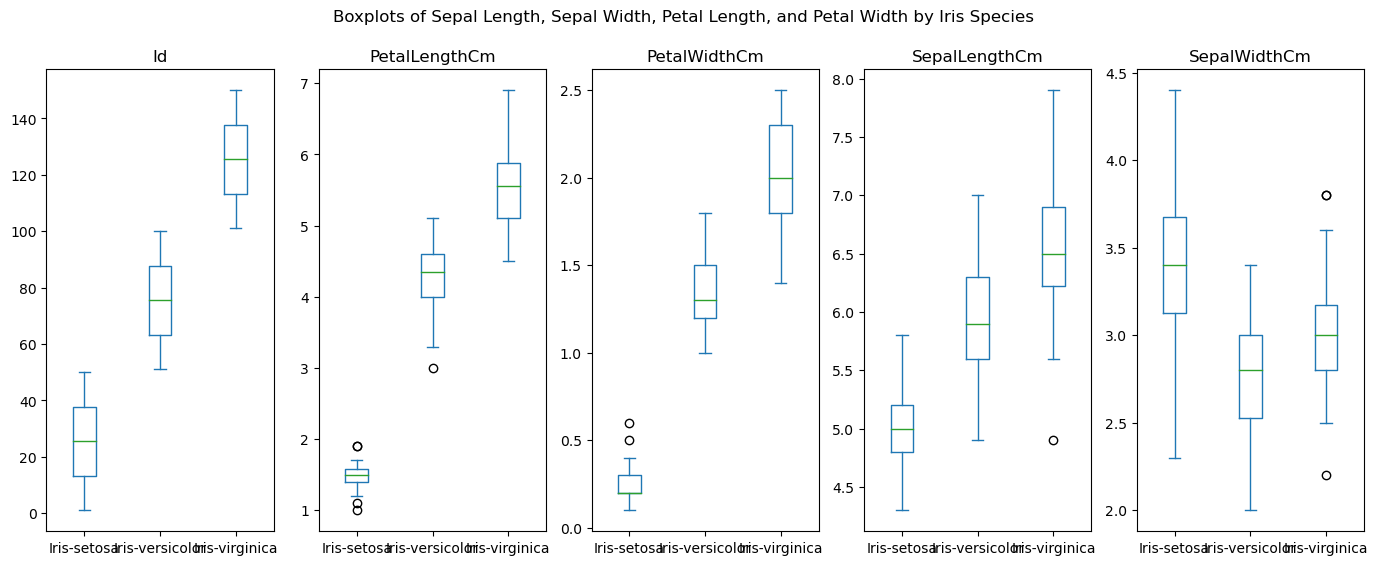

In [16]:
iris.plot(kind='box', by='Species', figsize=(17,6),title="Boxplots of Sepal Length, Sepal Width, Petal Length, and Petal Width by Iris Species")

## input for machine learning model

In [21]:
input_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
iris_input = iris[input_features]
iris_input

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Output for machine learning model

In [23]:
output_features = ['Species']
iris_output = iris[output_features]
iris_output

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [24]:
#  train_test_split gives us a list with 4 values

iris_input_train, iris_input_test, iris_output_train, iris_output_test = train_test_split(iris_input, iris_output, test_size = 0.2)

#now input_train =120 rows and 4 col to train the model
#output_train = 120 rows and 1 col for output of training model


#input_test = 30 rows and 4 col to test the model
#output_test =30 rows and 1 col to check the output of prediciton


In [25]:
iris_input_train 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
12,4.8,3.0,1.4,0.1
47,4.6,3.2,1.4,0.2
18,5.7,3.8,1.7,0.3
128,6.4,2.8,5.6,2.1
126,6.2,2.8,4.8,1.8
...,...,...,...,...
69,5.6,2.5,3.9,1.1
14,5.8,4.0,1.2,0.2
144,6.7,3.3,5.7,2.5
5,5.4,3.9,1.7,0.4


In [26]:
model = KNeighborsClassifier()
# this model use Euclidean distance or Manhattan distance.
# Fitting the model on training data
model.fit(iris_input_train, iris_output_train)

/Users/alokrajgond/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [27]:
predict = model.predict(iris_input_test)
predict

/Users/alokrajgond/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [28]:
iris_output_test

,Species
140,Iris-virginica
71,Iris-versicolor
77,Iris-versicolor
133,Iris-virginica
24,Iris-setosa
54,Iris-versicolor
30,Iris-setosa
146,Iris-virginica
72,Iris-versicolor
26,Iris-setosa


In [29]:
accuracy_score(iris_output_test, predict)

0.9666666666666667

In [30]:
accuracy_score(iris_output_test, predict).mean()

0.9666666666666667

In [31]:
accuracy = accuracy_score(iris_output_test, predict)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


In [32]:
new_data = [[5.1, 3.5, 1.4, 0.2]]  # this is an example input
predicted_class = model.predict(new_data)
print(f"Predicted class: {predicted_class}")

Predicted class: ['Iris-setosa']


/Users/alokrajgond/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/alokrajgond/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
